In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
azn = pd.read_csv("AZN.L.csv")
dge = pd.read_csv("DGE.L.csv")
hsbc = pd.read_csv("HSBA.L.csv")
shell = pd.read_csv("SHEL.L.csv")

In [3]:
shell

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/31/2020,1300.000000,1314.199951,1287.000000,1297.800049,1143.557129,2696410.0
1,1/4/2021,1316.800049,1352.000000,1295.199951,1302.199951,1147.434204,6288131.0
2,1/5/2021,1311.400024,1391.599976,1308.800049,1391.599976,1226.208984,9980143.0
3,1/6/2021,1417.599976,1483.094971,1407.199951,1473.599976,1298.463501,18249583.0
4,1/7/2021,1495.599976,1505.475952,1451.209961,1474.400024,1299.168335,12637268.0
...,...,...,...,...,...,...,...
750,12/21/2023,2556.000000,2576.000000,2545.000000,2557.000000,2529.458984,13029100.0
751,12/22/2023,2559.500000,2577.500000,2555.000000,2566.500000,2538.856689,3698032.0
752,12/27/2023,2567.500000,2585.500000,2551.000000,2556.000000,2528.469727,5772822.0
753,12/28/2023,2548.500000,2565.554932,2538.000000,2549.000000,2521.545166,5805909.0


##### Data Transformation

In [4]:
dataframes = [azn, dge, hsbc, shell]

# Loop through each DataFrame index
for i in range(len(dataframes)):
    # Select specific columns
    dataframes[i] = dataframes[i][["Date", "Close"]]
    
    # Rename columns
    dataframes[i].columns = ["Date", "Closing Price"]

    dataframes[i].set_index('Date', inplace=True)

azn, dge, hsbc, shell = dataframes

In [5]:
azn

,Closing Price
Date,
2020-12-31,7324.0
2021-01-04,7422.0
2021-01-05,7439.0
2021-01-06,7512.0
2021-01-07,7475.0
...,...
2023-12-21,10480.0
2023-12-22,10436.0
2023-12-27,10528.0


##### Checking missing records in each DataFrame 

In [6]:
for df in dataframes:
    # Filter rows with null values
    null_records = df[df.isnull().any(axis=1)]
    print(null_records)

Empty DataFrame
Columns: [Closing Price]
Index: []
Empty DataFrame
Columns: [Closing Price]
Index: []
Empty DataFrame
Columns: [Closing Price]
Index: []
Empty DataFrame
Columns: [Closing Price]
Index: []


##### Task 1 - Analyse completeness of data. Are there missed data (besides weekends)? How many missed data points are in your time series? Are the dates of missed values the same for all your time series? What may be the reasons for missing?

Checking missed data points in the time series 

In [7]:
# Define the date range
start_date = '2020-12-31'
end_date = '2023-12-29'

# Create a DatetimeIndex for the entire date range excluding weekends
expected_index = pd.date_range(start=start_date, end=end_date, freq='B')

for df in dataframes:
    # Count the actual number of data points
    # Excluding 31/12/2020
    actual_count = len(df)

    # Calculate the number of missed data points
    missed_count = len(expected_index) - actual_count
    print("Total data points (business days):", len(expected_index))
    print("Actual data points:", actual_count)
    print("Missed data points:", missed_count)

Total data points (business days): 782
Actual data points: 755
Missed data points: 27
Total data points (business days): 782
Actual data points: 755
Missed data points: 27
Total data points (business days): 782
Actual data points: 755
Missed data points: 27
Total data points (business days): 782
Actual data points: 755
Missed data points: 27


In the above output we can see that there are 27 data points missing for the 4 stocks. The dates of missed values are the same for all the time series.

Looking at the missing dates below

In [8]:
# Convert the index of your DataFrame to DatetimeIndex
azn.index = pd.to_datetime(azn.index)

# Extract the actual dates present in your DataFrame
actual_dates = pd.to_datetime(azn.index.date)

# Find the missing dates
missed_dates = expected_index[~expected_index.isin(actual_dates)]

# Create a DataFrame for missed dates and days
missed_dates_df = pd.DataFrame({
    'Date': missed_dates,
    'Day': missed_dates.strftime("%A")
})

In [9]:
for df in dataframes:
    df.reset_index(inplace=True)

In [10]:
for df in dataframes:
    df['Date'] = pd.to_datetime(df['Date'])

C:\Users\arjun\AppData\Local\Temp\ipykernel_7248\2960460322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
d = {'Date': expected_index}
date_range = pd.DataFrame(data=d)
date_range['Date'] = pd.to_datetime(date_range['Date'])
date_range

,Date
0,2020-12-31
1,2021-01-01
2,2021-01-04
3,2021-01-05
4,2021-01-06
...,...
777,2023-12-25
778,2023-12-26
779,2023-12-27
780,2023-12-28


In [12]:
date_range = pd.merge(date_range, azn[['Date', 'Closing Price']], on='Date', how='left', suffixes=('', '_azn'))
date_range = pd.merge(date_range, dge[['Date', 'Closing Price']], on='Date', how='left', suffixes=('', '_dge'))
date_range = pd.merge(date_range, hsbc[['Date', 'Closing Price']], on='Date', how='left', suffixes=('', '_hsbc'))
date_range = pd.merge(date_range, shell[['Date', 'Closing Price']], on='Date', how='left', suffixes=('', '_shell'))
date_range

,Date,Closing Price,Closing Price_dge,Closing Price_hsbc,Closing Price_shell
0,2020-12-31,7324.0,2878.0,378.850006,1297.800049
1,2021-01-01,NaN,NaN,NaN,NaN
2,2021-01-04,7422.0,2948.0,380.350006,1302.199951
3,2021-01-05,7439.0,2945.5,378.600006,1391.599976
4,2021-01-06,7512.0,2946.5,416.149994,1473.599976
...,...,...,...,...,...
777,2023-12-25,NaN,NaN,NaN,NaN
778,2023-12-26,NaN,NaN,NaN,NaN
779,2023-12-27,10528.0,2853.5,631.500000,2556.000000
780,2023-12-28,10574.0,2848.5,631.599976,2549.000000


In [13]:
date_range.rename(columns={'Closing Price': 'Closing Price_azn'}, inplace=True)
date_range

,Date,Closing Price_azn,Closing Price_dge,Closing Price_hsbc,Closing Price_shell
0,2020-12-31,7324.0,2878.0,378.850006,1297.800049
1,2021-01-01,NaN,NaN,NaN,NaN
2,2021-01-04,7422.0,2948.0,380.350006,1302.199951
3,2021-01-05,7439.0,2945.5,378.600006,1391.599976
4,2021-01-06,7512.0,2946.5,416.149994,1473.599976
...,...,...,...,...,...
777,2023-12-25,NaN,NaN,NaN,NaN
778,2023-12-26,NaN,NaN,NaN,NaN
779,2023-12-27,10528.0,2853.5,631.500000,2556.000000
780,2023-12-28,10574.0,2848.5,631.599976,2549.000000


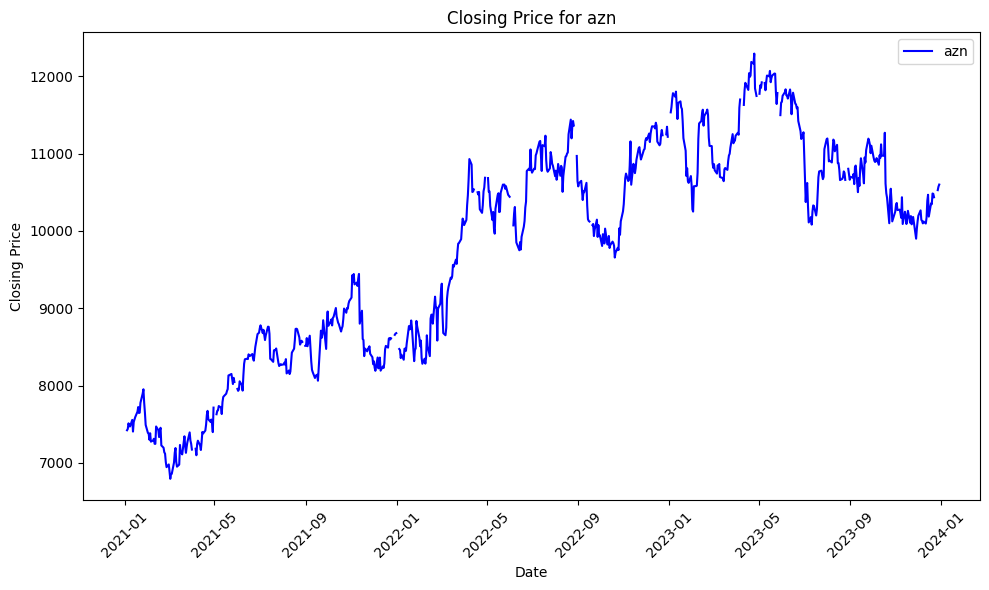

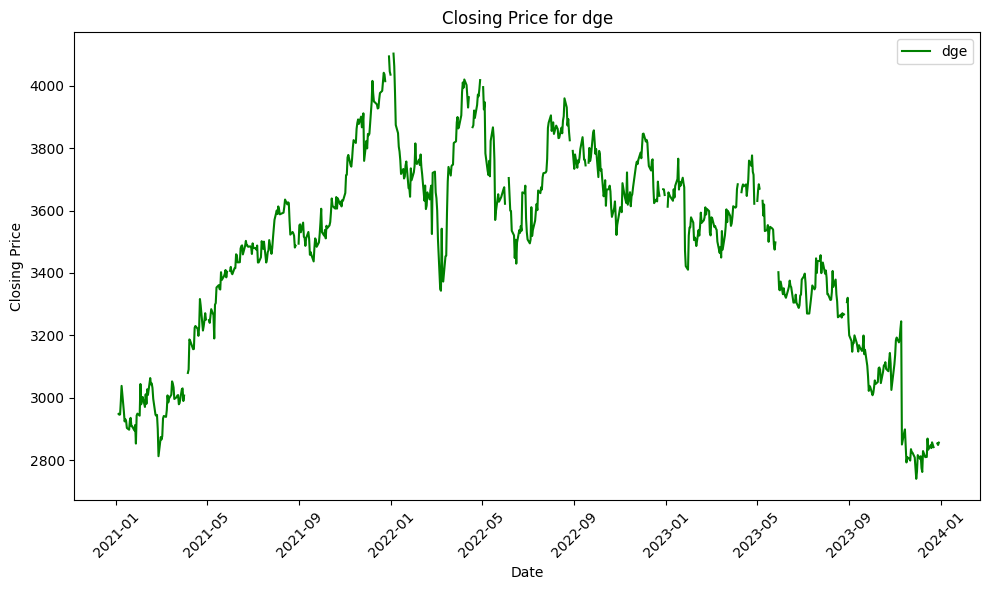

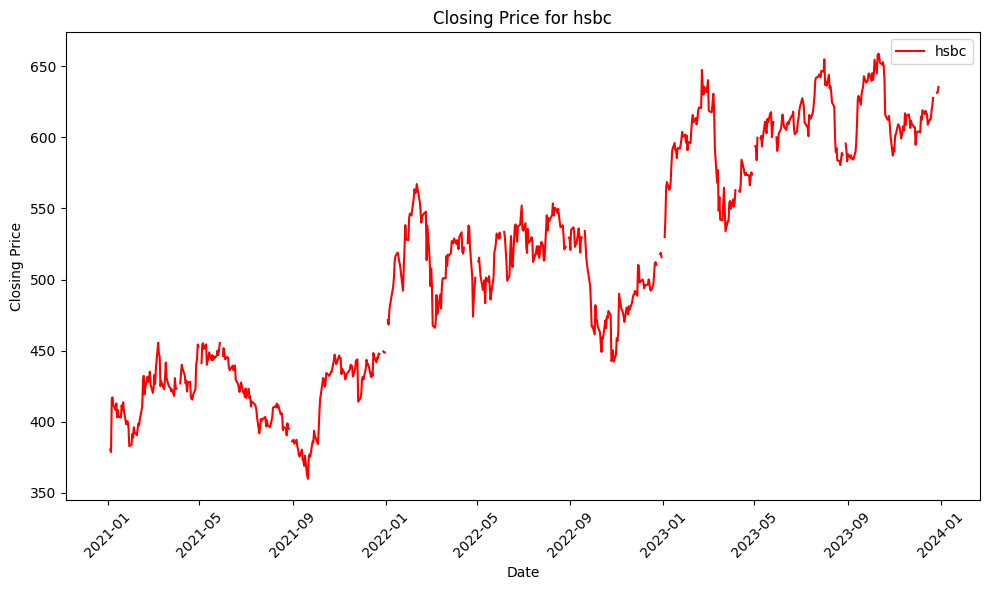

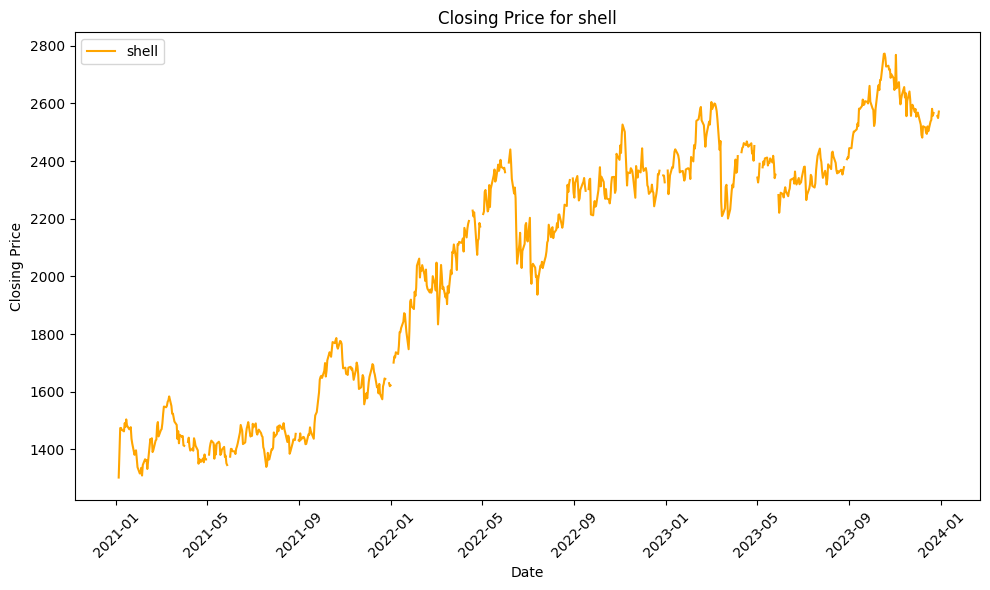

In [14]:
# Get the list of columns containing closing prices for each stock
closing_price_columns = [col for col in date_range.columns if 'Closing Price_' in col]

# Plot individual stock prices

# Define colors for each stock
colors = ['blue', 'green', 'red', 'orange']

for i, col in enumerate(closing_price_columns):
    plt.figure(figsize=(10, 6))
    stock_name = col.split('_')[-1]  # Extract stock name from column name
    plt.plot(date_range['Date'], date_range[col], color=colors[i], label=stock_name)
    plt.title(f'Closing Price for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

##### Task 2 - How can you handle the missed values in your data (explain at least three approaches)? Use the simple rule: fill in a missed value by the closest in time past existing value. Plot the results.
##### Transform the time series to the dimensionless log-returns: yi = ln(xi/xi−1). Calculate the variance and the mean. Normalise to the z-score (zero mean and unit standard deviation). Plot the results. Describe your observations.

In [15]:
missed_dates_list = missed_dates_df['Date'].tolist()

closest_past_value_azn = []
closest_past_value_dge = []
closest_past_value_hsbc = []
closest_past_value_shell = []

for date in missed_dates_list:
    closest_past_date = azn[azn["Date"] <= date].index.max()  # Find the closest past date
    closest_past_value_azn.append(azn.loc[closest_past_date]['Closing Price']) # Get the value for the closest past date
    
for date in missed_dates_list:
    closest_past_date = dge[dge["Date"] <= date].index.max()  # Find the closest past date
    closest_past_value_dge.append(dge.loc[closest_past_date]['Closing Price']) # Get the value for the closest past date

for date in missed_dates_list:
    closest_past_date = hsbc[hsbc["Date"] <= date].index.max()  # Find the closest past date
    closest_past_value_hsbc.append(hsbc.loc[closest_past_date]['Closing Price']) # Get the value for the closest past date
    
for date in missed_dates_list:
    closest_past_date = shell[shell["Date"] <= date].index.max()  # Find the closest past date
    closest_past_value_shell.append(shell.loc[closest_past_date]['Closing Price']) # Get the value for the closest past date
    
missed_dates_df['closest_past_value_azn'] = closest_past_value_azn
missed_dates_df['closest_past_value_dge'] = closest_past_value_dge
missed_dates_df['closest_past_value_hsbc'] = closest_past_value_hsbc
missed_dates_df['closest_past_value_shell'] = closest_past_value_shell

missed_dates_df

,Date,Day,closest_past_value_azn,closest_past_value_dge,closest_past_value_hsbc,closest_past_value_shell
0,2021-01-01,Friday,7324.0,2878.0,378.850006,1297.800049
1,2021-04-02,Friday,7172.0,3007.0,423.200012,1412.199951
2,2021-04-05,Monday,7172.0,3007.0,423.200012,1412.199951
3,2021-05-03,Monday,7715.0,3251.0,452.799988,1365.000000
4,2021-05-31,Monday,8046.0,3404.0,455.299988,1345.599976
5,2021-08-30,Monday,8565.0,3487.5,394.950012,1453.800049
6,2021-12-27,Monday,8611.0,4015.0,447.700012,1644.000000
7,2021-12-28,Tuesday,8611.0,4015.0,447.700012,1644.000000
8,2022-01-03,Monday,8678.0,4036.0,448.649994,1621.800049
9,2022-04-15,Friday,10536.0,3963.5,522.400024,2192.000000


In [16]:
for index, row in missed_dates_df.iterrows():
    date = row['Date']
    closest_past_value_azn = row['closest_past_value_azn']
    closest_past_value_dge = row['closest_past_value_dge']
    closest_past_value_hsbc = row['closest_past_value_hsbc']
    closest_past_value_shell = row['closest_past_value_shell']
    
    # Fill the 'Closing Price' in date_range where the 'Date' matches
    date_range.loc[date_range['Date'] == date, 'Closing Price_azn'] = closest_past_value_azn
    date_range.loc[date_range['Date'] == date, 'Closing Price_dge'] = closest_past_value_dge
    date_range.loc[date_range['Date'] == date, 'Closing Price_hsbc'] = closest_past_value_hsbc
    date_range.loc[date_range['Date'] == date, 'Closing Price_shell'] = closest_past_value_shell


In [17]:
date_range

,Date,Closing Price_azn,Closing Price_dge,Closing Price_hsbc,Closing Price_shell
0,2020-12-31,7324.0,2878.0,378.850006,1297.800049
1,2021-01-01,7324.0,2878.0,378.850006,1297.800049
2,2021-01-04,7422.0,2948.0,380.350006,1302.199951
3,2021-01-05,7439.0,2945.5,378.600006,1391.599976
4,2021-01-06,7512.0,2946.5,416.149994,1473.599976
...,...,...,...,...,...
777,2023-12-25,10436.0,2841.5,627.799988,2566.500000
778,2023-12-26,10436.0,2841.5,627.799988,2566.500000
779,2023-12-27,10528.0,2853.5,631.500000,2556.000000
780,2023-12-28,10574.0,2848.5,631.599976,2549.000000


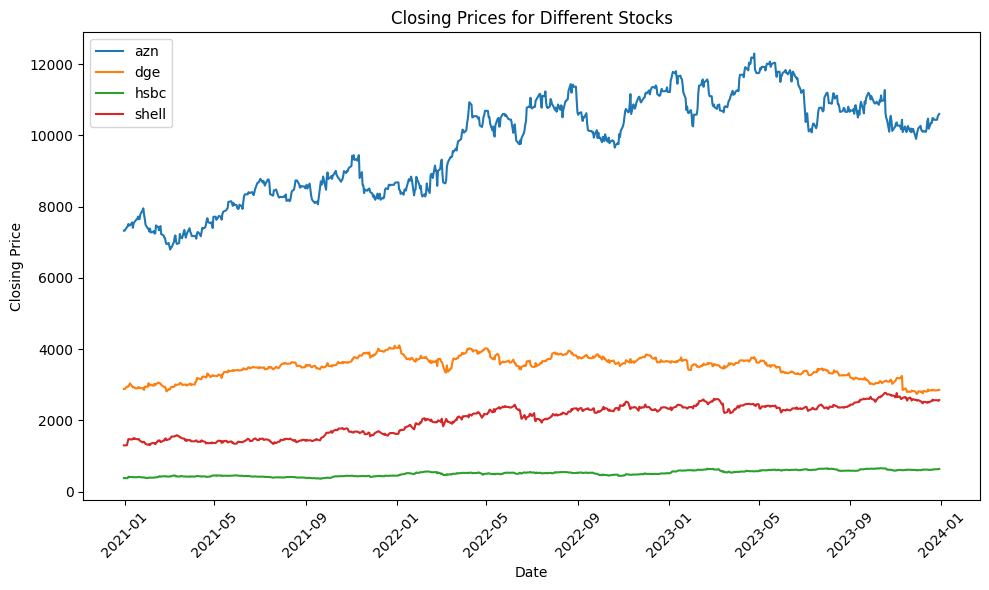

In [18]:
# Get the list of columns containing closing prices for each stock
closing_price_columns = [col for col in date_range.columns if 'Closing Price_' in col]

# Plot individual stock prices
plt.figure(figsize=(10, 6))

for col in closing_price_columns:
    stock_name = col.split('_')[-1]  # Extract stock name from column name
    plt.plot(date_range['Date'], date_range[col], label=stock_name)

plt.title('Closing Prices for Different Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

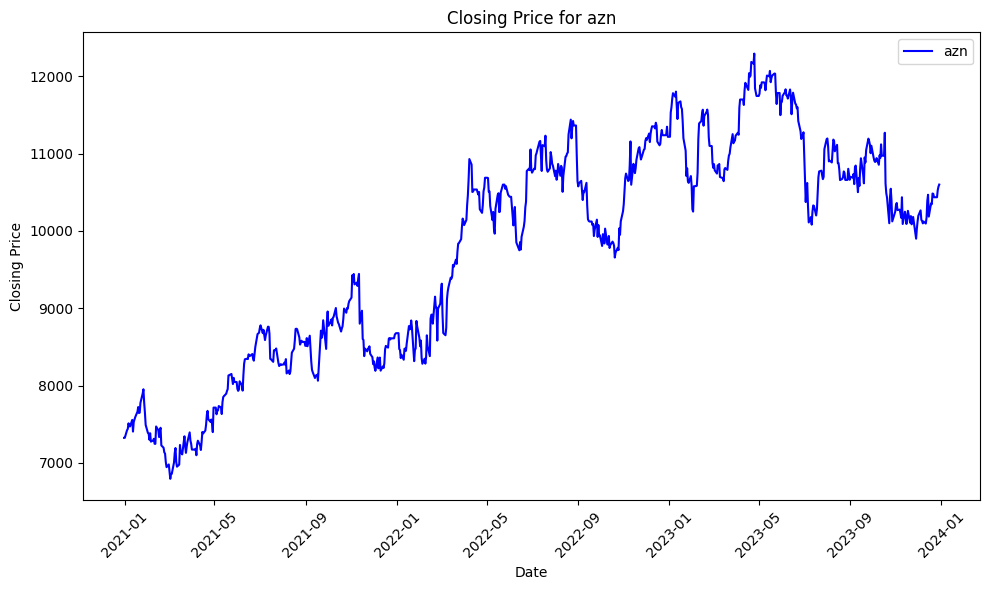

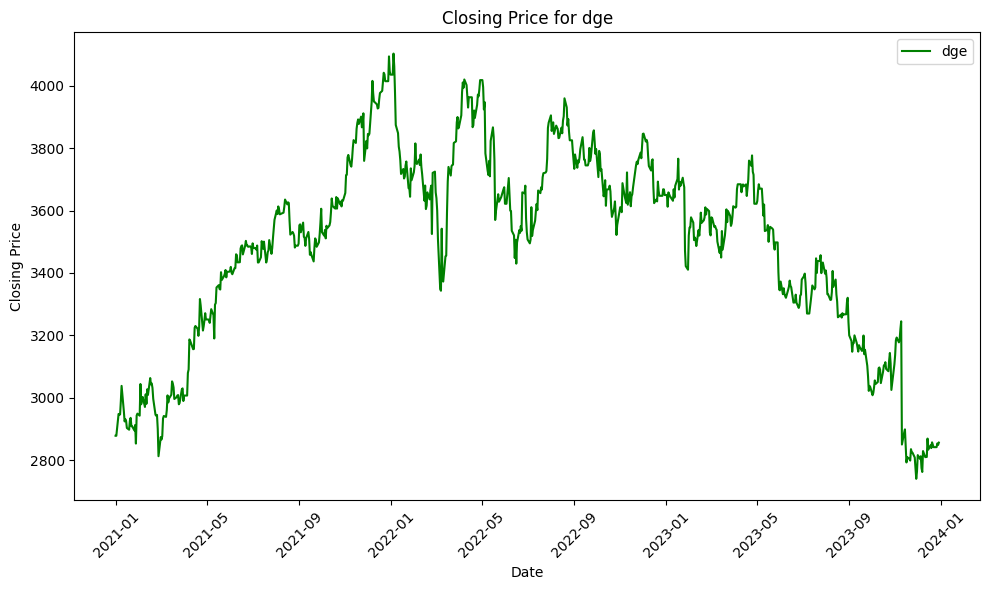

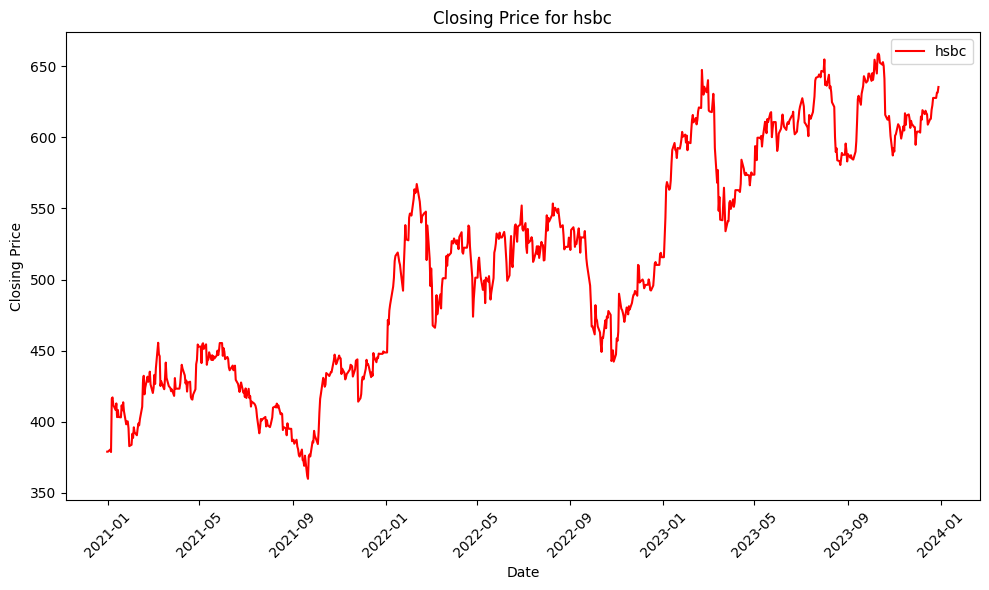

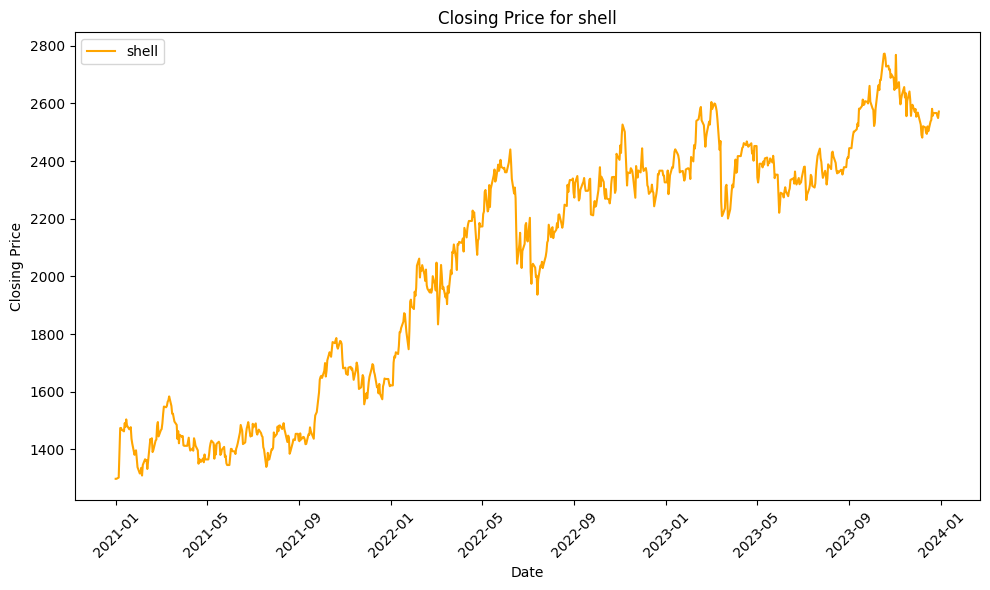

In [19]:
# Plot individual stock prices

# Define colors for each stock
colors = ['blue', 'green', 'red', 'orange']

for i, col in enumerate(closing_price_columns):
    plt.figure(figsize=(10, 6))
    stock_name = col.split('_')[-1]  # Extract stock name from column name
    plt.plot(date_range['Date'], date_range[col], color=colors[i], label=stock_name)
    plt.title(f'Closing Price for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
# Separate DataFrame for AZN (AstraZeneca)
azn = date_range[['Date', 'Closing Price_azn']].copy()

# Separate DataFrame for DGE (Diageo)
dge = date_range[['Date', 'Closing Price_dge']].copy()

# Separate DataFrame for HSBC
hsbc = date_range[['Date', 'Closing Price_hsbc']].copy()

# Separate DataFrame for Shell
shell = date_range[['Date', 'Closing Price_shell']].copy()

dataframes = []

dataframes = [azn, dge, hsbc, shell]

azn.rename(columns={'Closing Price_azn': 'Closing Price'}, inplace=True)
dge.rename(columns={'Closing Price_dge': 'Closing Price'}, inplace=True)
hsbc.rename(columns={'Closing Price_hsbc': 'Closing Price'}, inplace=True)
shell.rename(columns={'Closing Price_shell': 'Closing Price'}, inplace=True)

In [21]:
for df in dataframes:
    # Calculate log returns
    df['Log_Returns'] = np.log(df['Closing Price'] / df['Closing Price'].shift(1))

    # Calculate mean and variance of log returns
    mean_log_returns = df['Log_Returns'].mean()
    variance_log_returns = df['Log_Returns'].var()

    # Normalize to z-score
    df['Z_Score'] = (df['Log_Returns'] - mean_log_returns) / np.sqrt(variance_log_returns)

    print("Mean of Log Returns:", mean_log_returns)
    print("Variance of Log Returns:", variance_log_returns)
    print("\nDataFrame with Log Returns and Z-Score Normalized:")
    print(df)

Mean of Log Returns: 0.00047336411562836907
Variance of Log Returns: 0.00020812092168641518

DataFrame with Log Returns and Z-Score Normalized:
          Date  Closing Price  Log_Returns   Z_Score
0   2020-12-31         7324.0          NaN       NaN
1   2021-01-01         7324.0     0.000000 -0.032812
2   2021-01-04         7422.0     0.013292  0.888550
3   2021-01-05         7439.0     0.002288  0.125777
4   2021-01-06         7512.0     0.009765  0.644093
..         ...            ...          ...       ...
777 2023-12-25        10436.0     0.000000 -0.032812
778 2023-12-26        10436.0     0.000000 -0.032812
779 2023-12-27        10528.0     0.008777  0.575587
780 2023-12-28        10574.0     0.004360  0.269396
781 2023-12-29        10600.0     0.002456  0.137420

[782 rows x 4 columns]
Mean of Log Returns: -9.825306002351652e-06
Variance of Log Returns: 0.0001611095342495824

DataFrame with Log Returns and Z-Score Normalized:
          Date  Closing Price  Log_Returns   Z_Score


### Distributions of standardised log-returns in comparison with standard normal distribution

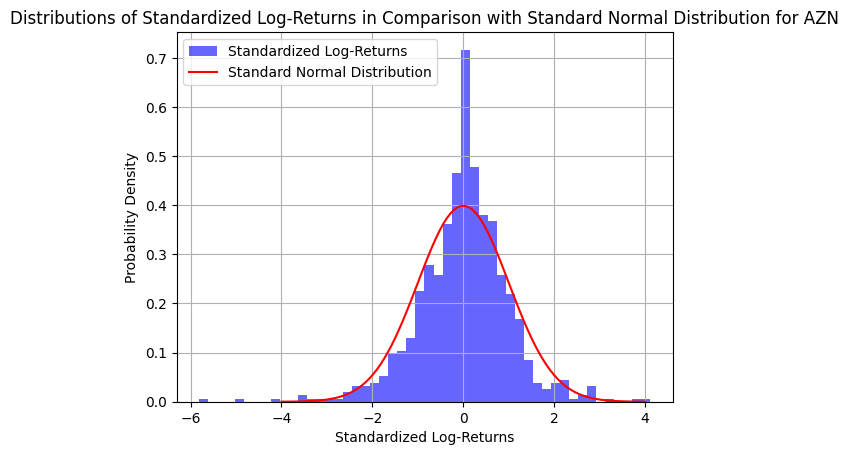

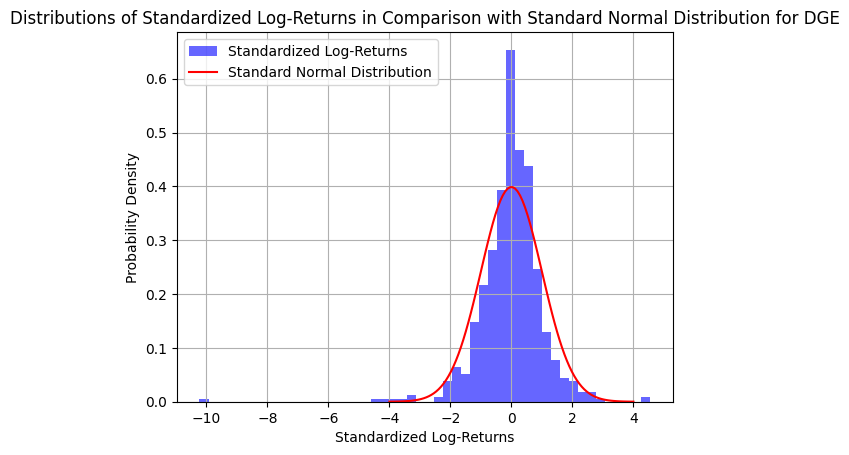

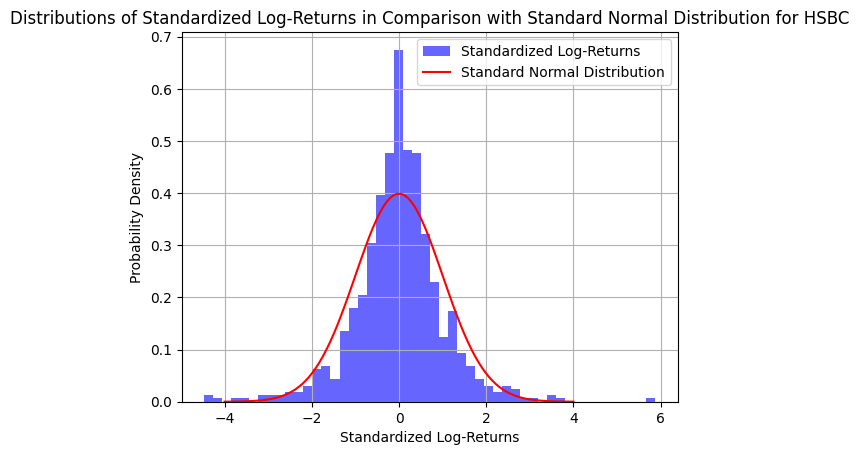

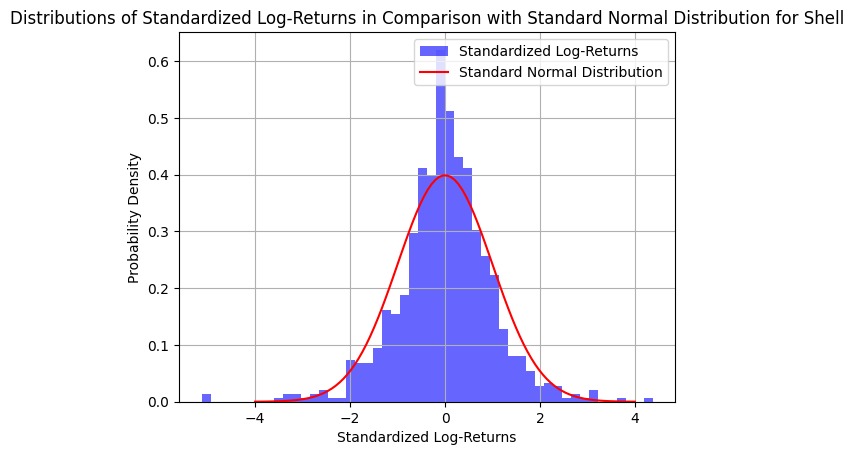

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_distribution_comparison(df, stock_name):
    # Calculate standardized log-returns
    z_scores = (df['Log_Returns'] - df['Log_Returns'].mean()) / df['Log_Returns'].std()

    # Plot histograms of standardized log-returns
    plt.hist(z_scores, bins=50, density=True, alpha=0.6, color='b', label='Standardized Log-Returns')

    # Plot the standard normal distribution
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1), 'r', label='Standard Normal Distribution')

    plt.title(f'Distributions of Standardized Log-Returns in Comparison with Standard Normal Distribution for {stock_name}')
    plt.xlabel('Standardized Log-Returns')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    

# Plot distribution comparison for AZN
plot_distribution_comparison(dataframes[0], 'AZN')

# Plot distribution comparison for DGE
plot_distribution_comparison(dataframes[1], 'DGE')

# Plot distribution comparison for HSBC
plot_distribution_comparison(dataframes[2], 'HSBC')

# Plot distribution comparison for Shell
plot_distribution_comparison(dataframes[3], 'Shell')


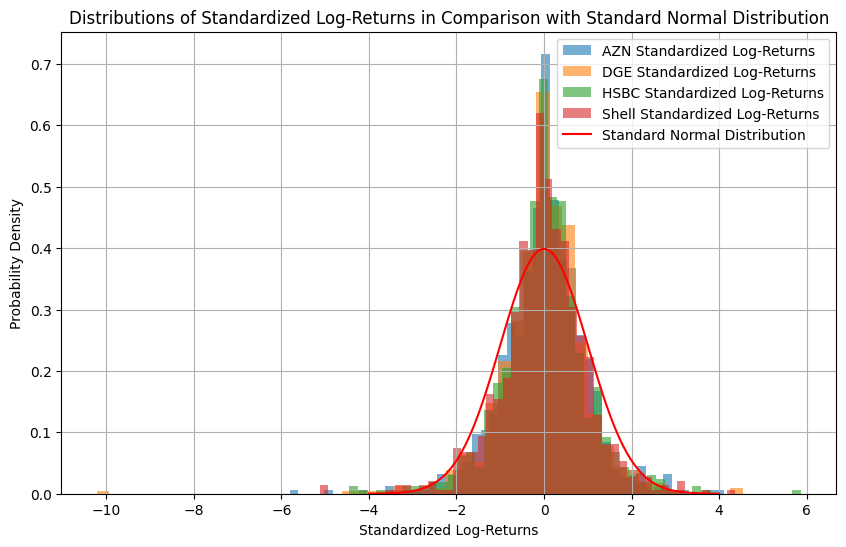

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_distribution_comparison(dataframes, stock_names):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    for df, stock_name in zip(dataframes, stock_names):
        # Calculate standardized log-returns
        z_scores = (df['Log_Returns'] - df['Log_Returns'].mean()) / df['Log_Returns'].std()

        # Plot histograms of standardized log-returns
        plt.hist(z_scores, bins=50, density=True, alpha=0.6, label=f'{stock_name} Standardized Log-Returns')

    # Plot the standard normal distribution
    x = np.linspace(-4, 4, 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1), 'r', label='Standard Normal Distribution')

    plt.title('Distributions of Standardized Log-Returns in Comparison with Standard Normal Distribution')
    plt.xlabel('Standardized Log-Returns')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distribution comparison for all stocks
plot_distribution_comparison(dataframes, ['AZN', 'DGE', 'HSBC', 'Shell'])


In [22]:
dataframes[2]

,Date,Closing Price,Log_Returns,Z_Score
0,2020-12-31,378.850006,NaN,NaN
1,2021-01-01,378.850006,0.000000,-0.041425
2,2021-01-04,380.350006,0.003952,0.205723
3,2021-01-05,378.600006,-0.004612,-0.329859
4,2021-01-06,416.149994,0.094566,5.873150
...,...,...,...,...
777,2023-12-25,627.799988,0.000000,-0.041425
778,2023-12-26,627.799988,0.000000,-0.041425
779,2023-12-27,631.500000,0.005876,0.326108
780,2023-12-28,631.599976,0.000158,-0.031524


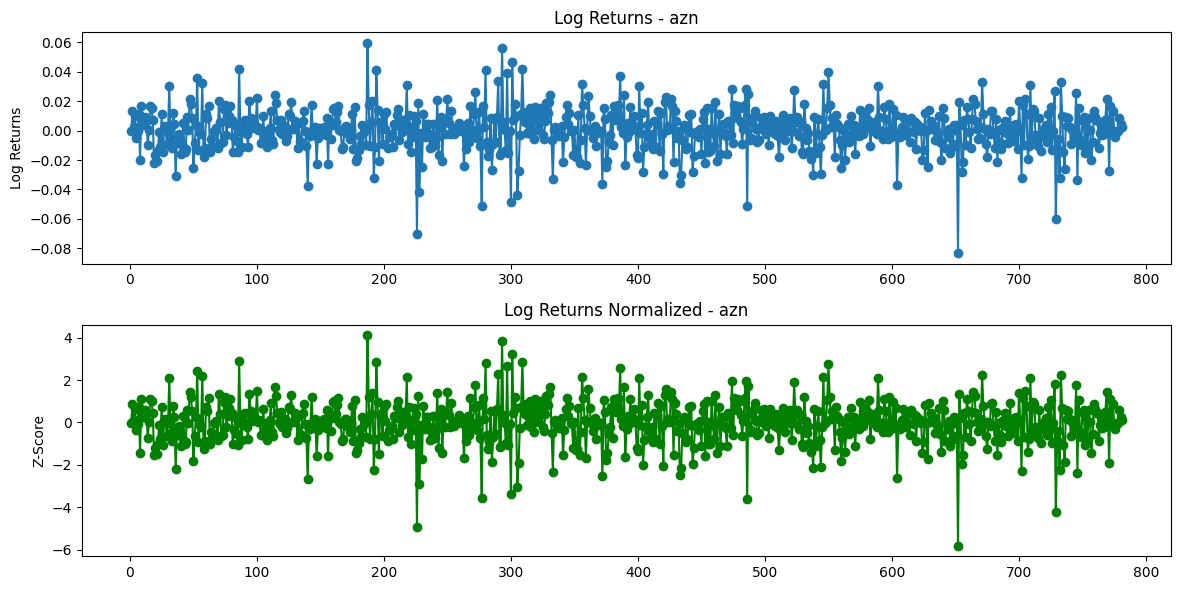

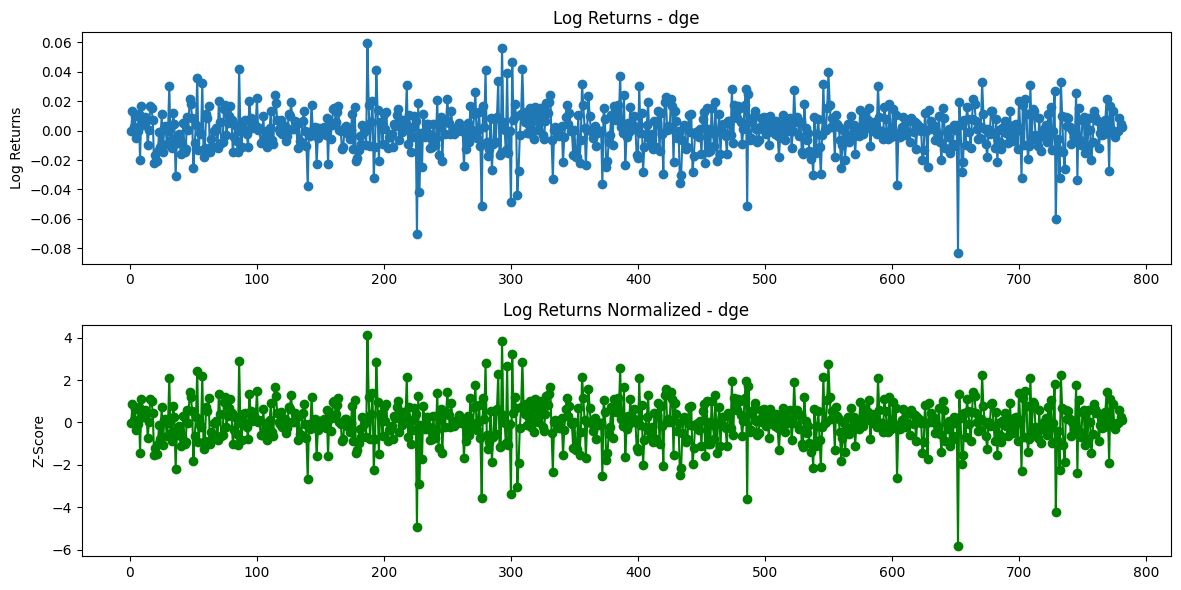

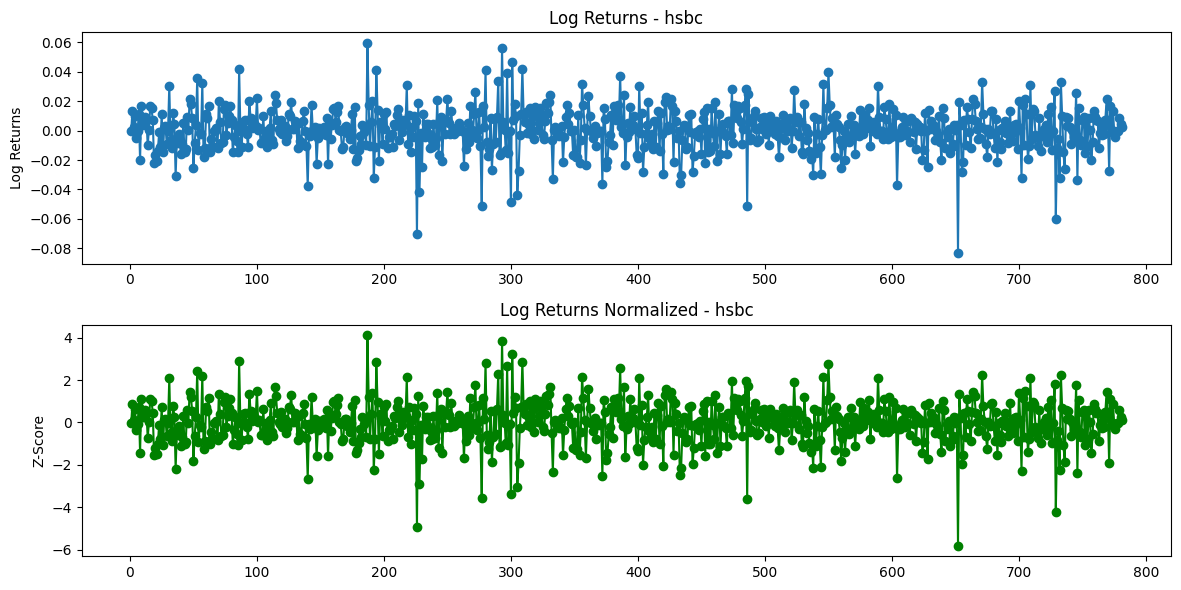

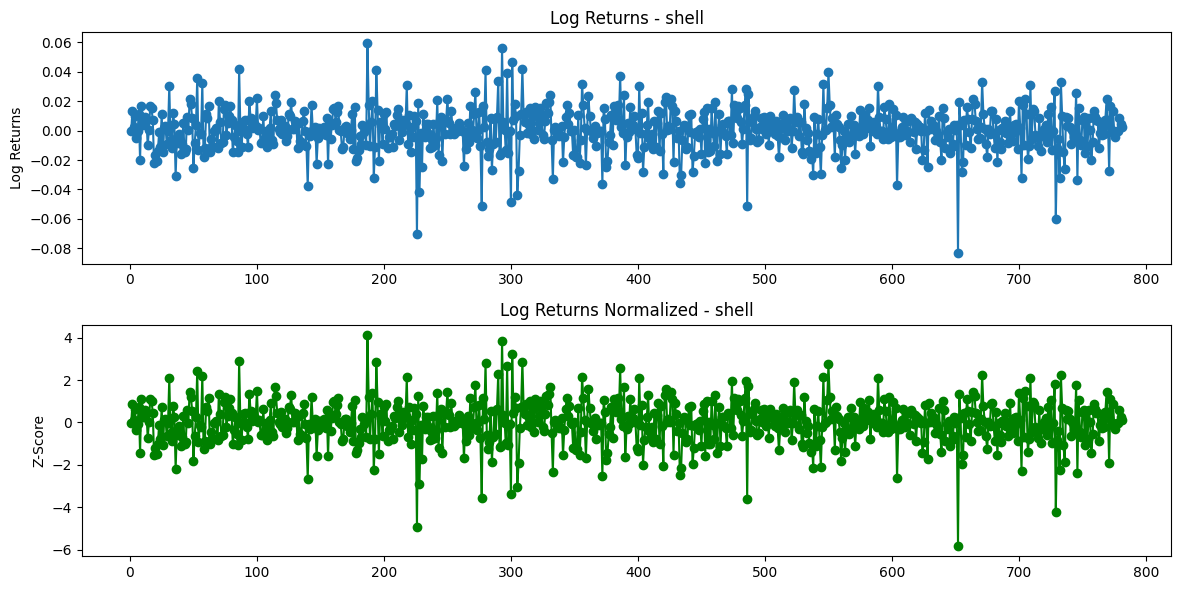

In [23]:
names = {'azn': azn, 'dge': dge, 'hsbc': hsbc, 'shell': shell}
for df in dataframes:
    for key, value in names.items():
        if value.equals(df):
            df_key = key
            break
    # Plot the log returns and Z-score
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(azn.index, azn['Log_Returns'], marker='o', linestyle='-')
    plt.title('Log Returns - ' + df_key)
    plt.ylabel('Log Returns')

    plt.subplot(2, 1, 2)
    plt.plot(azn.index, azn['Z_Score'], marker='o', linestyle='-', color='g')
    plt.title('Log Returns Normalized - ' + df_key)
    plt.ylabel('Z-Score')

    plt.tight_layout()
    plt.show()

##### Task 3 - Segmentation 

Prepare the bottom-up piecewise linear segmentation for the transformed and normalised logreturn time series. Use the following mean square error tolerance levels: 0.04, 0.1, 0.25 (the
thresholds of the mean square errors). Plot the results. Are the segment similar for different
time series you analysed?

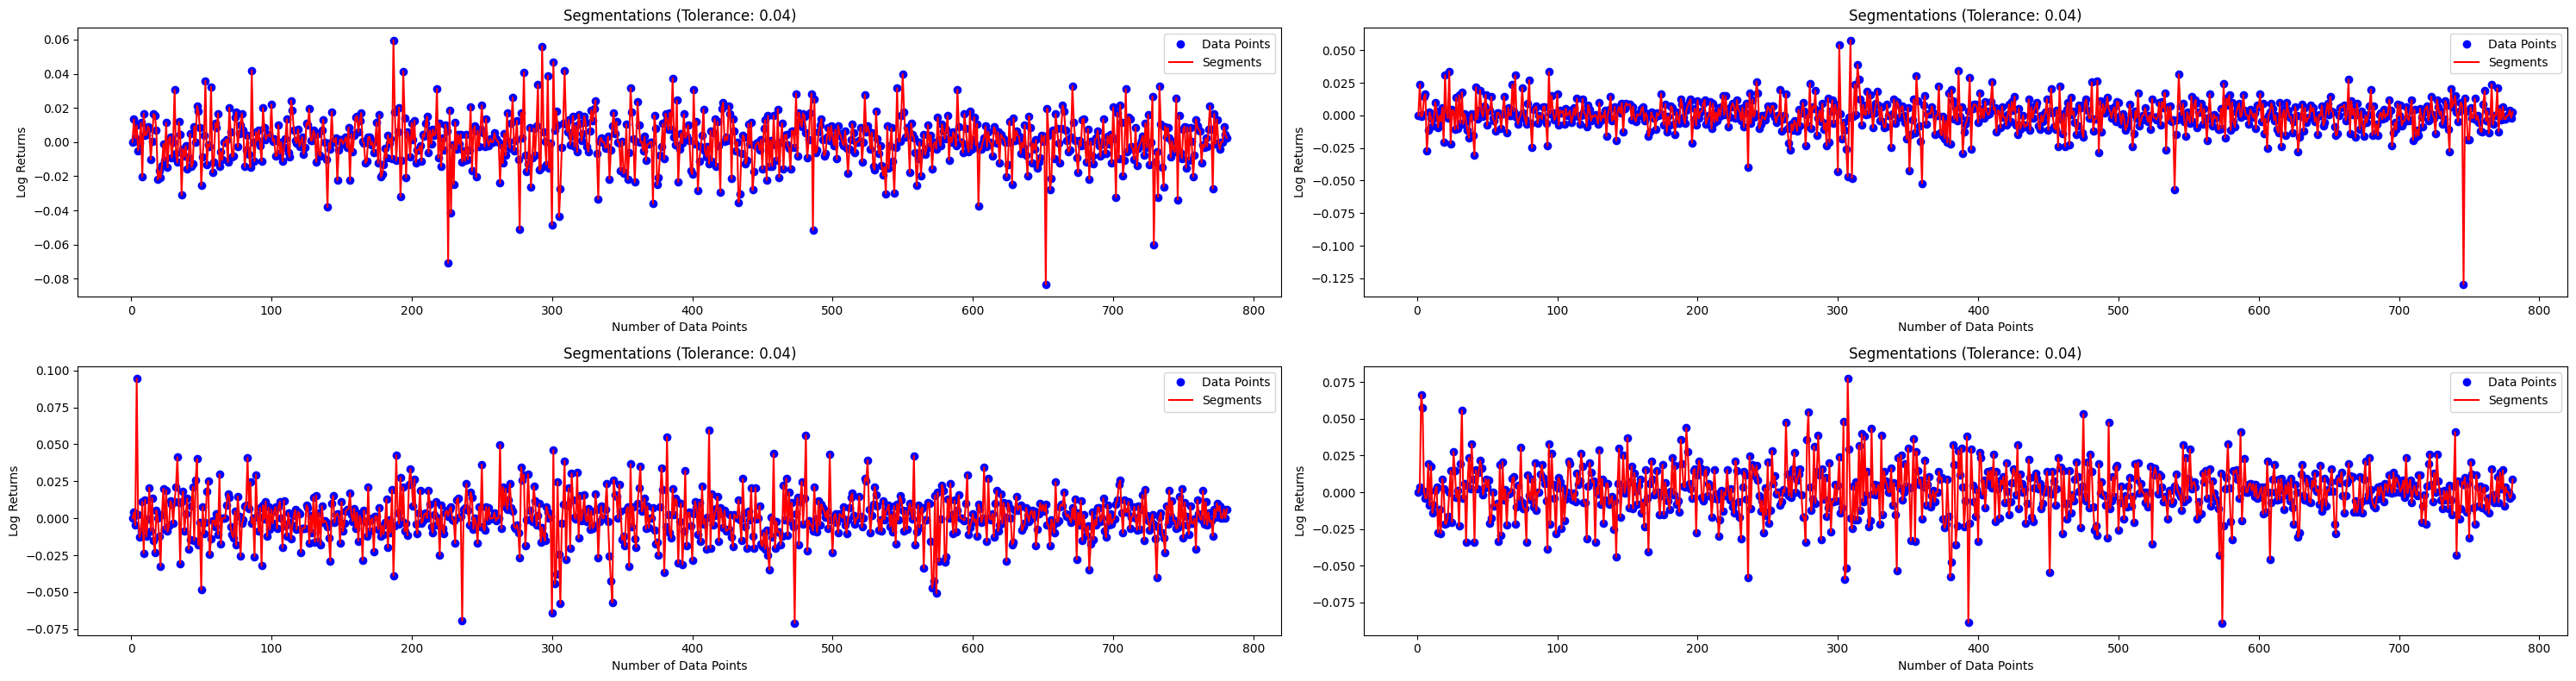

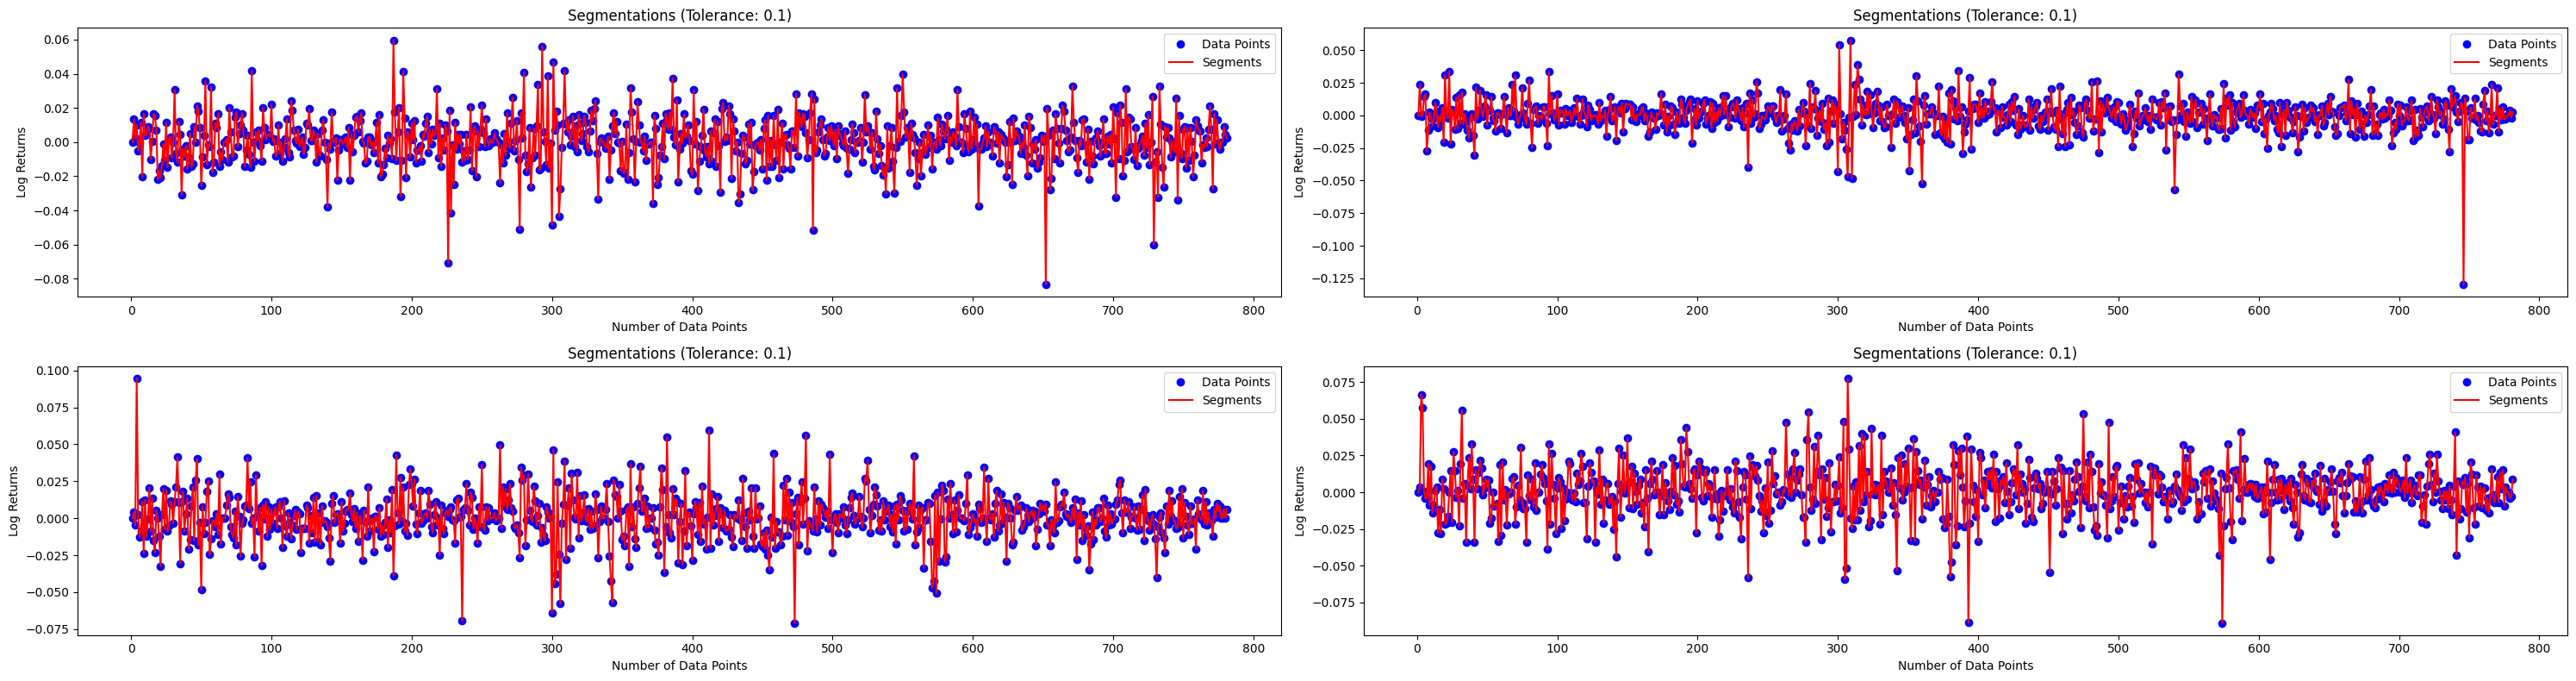

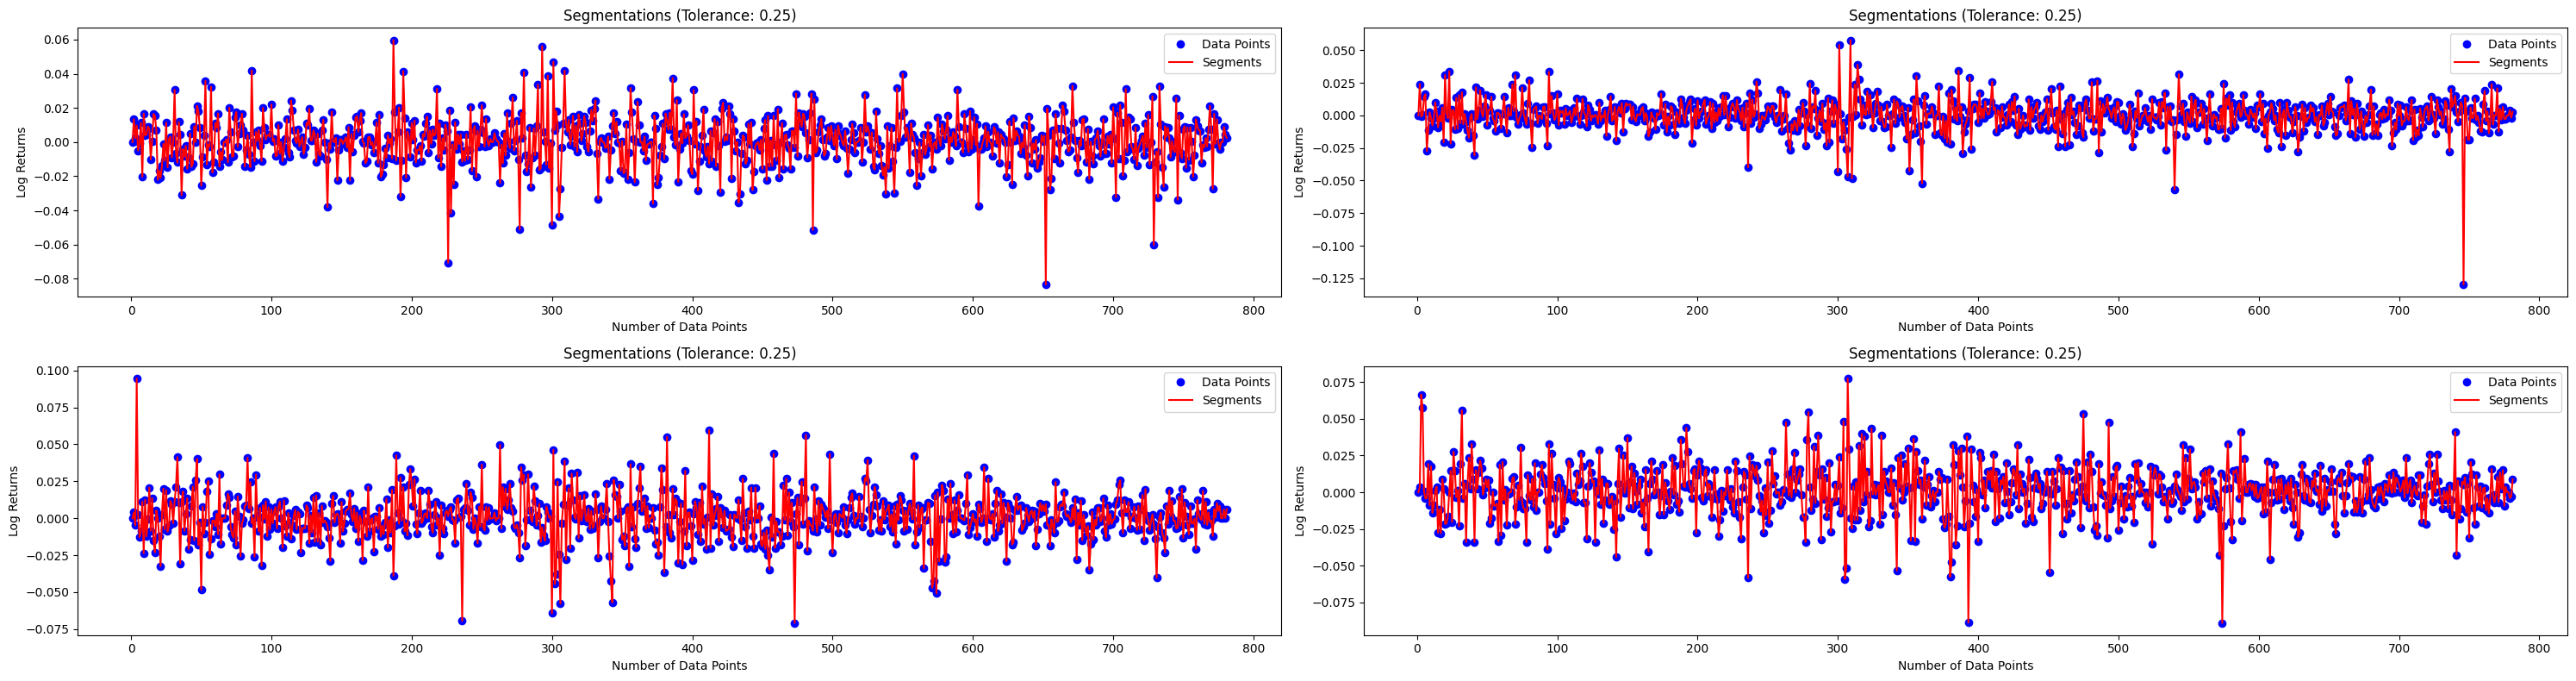

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_error(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def bottom_up_segmentation(log_returns, tolerance):
    segments = []
    n = len(log_returns)
    start = 0
    end = 1
    while end < n:
        line_params = np.polyfit(np.arange(start, end + 1), log_returns[start:end + 1], 1)
        y_hat = np.polyval(line_params, np.arange(start, end + 1))
        error = calculate_error(log_returns[start:end + 1], y_hat)
        if error > tolerance:
            segments.append({'Start': start, 'Stop': end - 1})  # Corrected stop index
            start = end
        end += 1
    segments.append({'Start': start, 'Stop': end - 1})
    return segments

tolerance_levels = [0.04, 0.1, 0.25]

for tol in tolerance_levels:
    plt.figure(figsize=(30, 8))
    for i, df_key in enumerate(['azn', 'dge', 'hsbc', 'shell']):
        df = dataframes[i]
        plt.subplot(2, 2, i+1)
        log_returns = df['Log_Returns'].values
        segments = bottom_up_segmentation(log_returns, tol)
        for segment in segments:
            start_idx = segment['Start']
            stop_idx = segment['Stop']
            plt.plot(np.arange(start_idx, stop_idx + 1), df['Log_Returns'].values[start_idx:stop_idx + 1], 'bo')  # Plot data points
            plt.plot(np.arange(start_idx, stop_idx + 1), df['Log_Returns'].values[start_idx:stop_idx + 1], 'r-')  # Plot segment lines
        plt.title(f'Segmentations (Tolerance: {tol})')
        plt.xlabel('Number of Data Points')
        plt.ylabel('Log Returns')
        plt.legend(['Data Points', 'Segments'], loc='upper right')
    plt.tight_layout()
    plt.show()


In [64]:
import numpy as np
import pandas as pd

def bottom_up_segmentation(log_returns, tolerance):
    segments = []
    n = len(log_returns)
    start = 0
    end = 1
    while end < n:
        segment_length = 1
        while end < n and np.abs(log_returns[end] - log_returns[start]) <= tolerance:
            end += 1
            segment_length += 1
        segments.append({'Start': start, 'Stop': end-1, 'Length': segment_length})
        start = end
        end += 1
    return segments

tolerance_levels = [0.04, 0.1, 0.25]
results = []

for tol in tolerance_levels:
    for i, df_key in enumerate(['azn', 'dge', 'hsbc', 'shell']):
        df = dataframes[i]
        log_returns = df['Log_Returns'].values
        segments = bottom_up_segmentation(log_returns, tol)
        num_segments = len(segments)
        max_segment_length = max(segment['Length'] for segment in segments)
        results.append({'Series': df_key.upper(), 'Tolerance': tol, 'NS': num_segments, 'MLS': max_segment_length})

results_df = pd.DataFrame(results)
print(results_df)


   Series  Tolerance  NS  MLS
0     AZN       0.04  53  173
1     DGE       0.04  24  299
2    HSBC       0.04  75   93
3   SHELL       0.04  79  131
4     AZN       0.10   2  781
5     DGE       0.10   4  745
6    HSBC       0.10   2  781
7   SHELL       0.10   2  781
8     AZN       0.25   2  781
9     DGE       0.25   2  781
10   HSBC       0.25   2  781
11  SHELL       0.25   2  781


### Learning curves

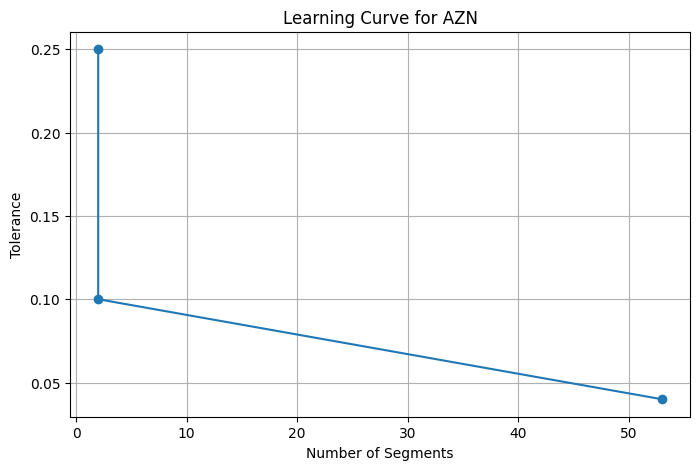

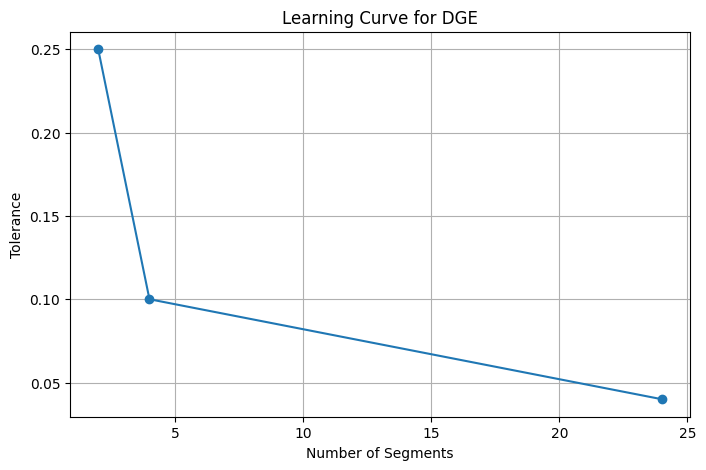

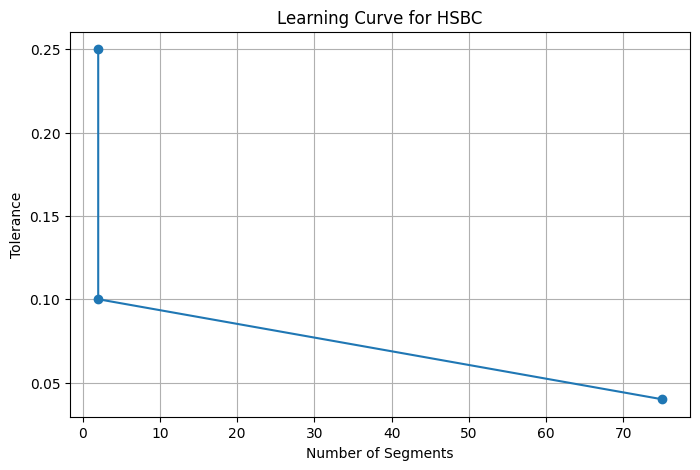

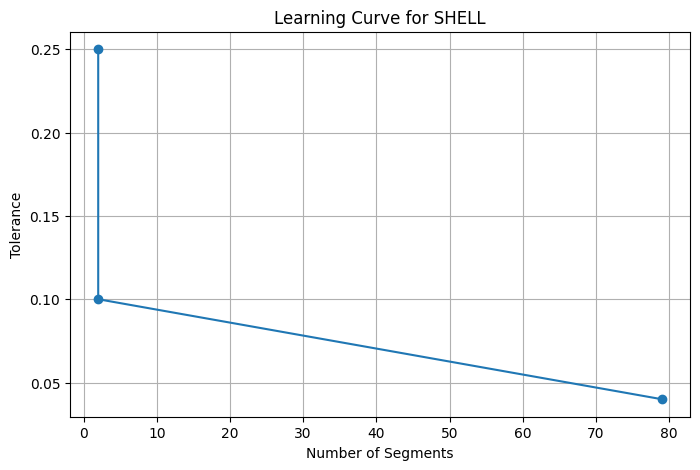

In [66]:
import matplotlib.pyplot as plt

# Data
series_data = {
    'AZN': {'Tolerance': [0.04, 0.10, 0.25], 'NS': [53, 2, 2]},
    'DGE': {'Tolerance': [0.04, 0.10, 0.25], 'NS': [24, 4, 2]},
    'HSBC': {'Tolerance': [0.04, 0.10, 0.25], 'NS': [75, 2, 2]},
    'SHELL': {'Tolerance': [0.04, 0.10, 0.25], 'NS': [79, 2, 2]}
}

# Plotting individual learning curves for each series
for series, data in series_data.items():
    plt.figure(figsize=(8, 5))
    plt.plot(data['NS'], data['Tolerance'], marker='o')
    plt.title(f'Learning Curve for {series}')
    plt.xlabel('Number of Segments')
    plt.ylabel('Tolerance')
    plt.grid(True)
    plt.show()



### Task 4: Chose one of the transformed and normalised log-return time series as a target g(t) and other
three as supporting data d1(t),d2(t),d3(t), where t = 1,...,T. Find g(t +1) (the next day value)
as a linear function Ψ of g(t),d1(t),d2(t),d3(t):
gˆ(t +1) = Ψ(g(t),d1(t),d2(t),d3(t)).
1
Provide scatter diagrams of (g(t),g(t + 1)). Provide plots of (g(t),gˆ(t)), the residual and the
scatter diagrams. Compare your result of forecasting to the next-day forecast ˆg(t +1) = g(t).
(How will you measure the quality of forecasting and compare these results?)


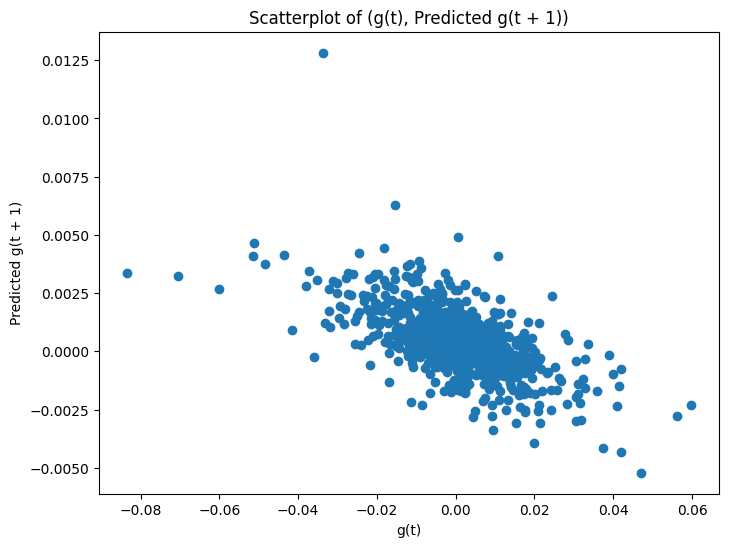

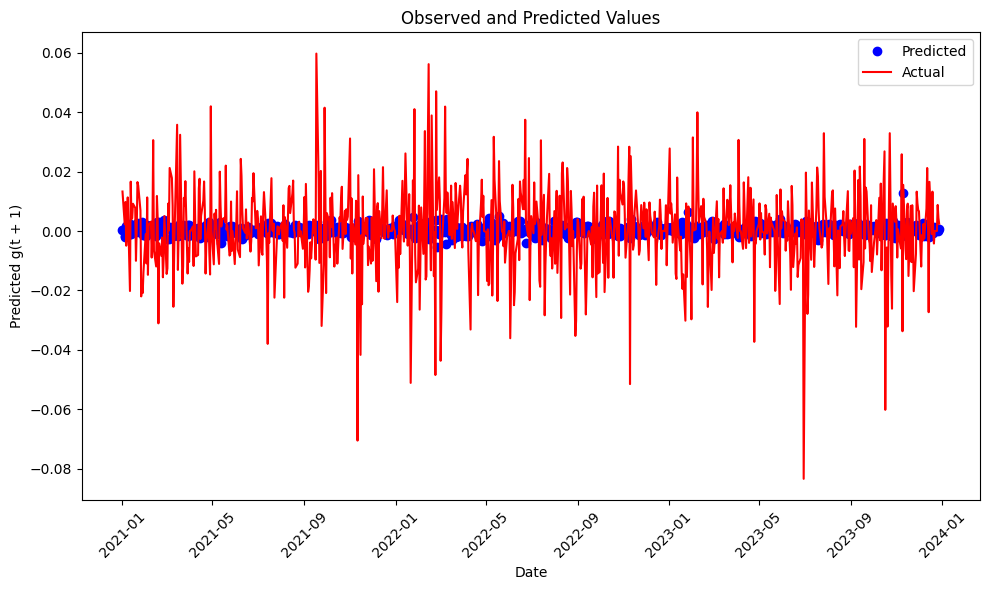

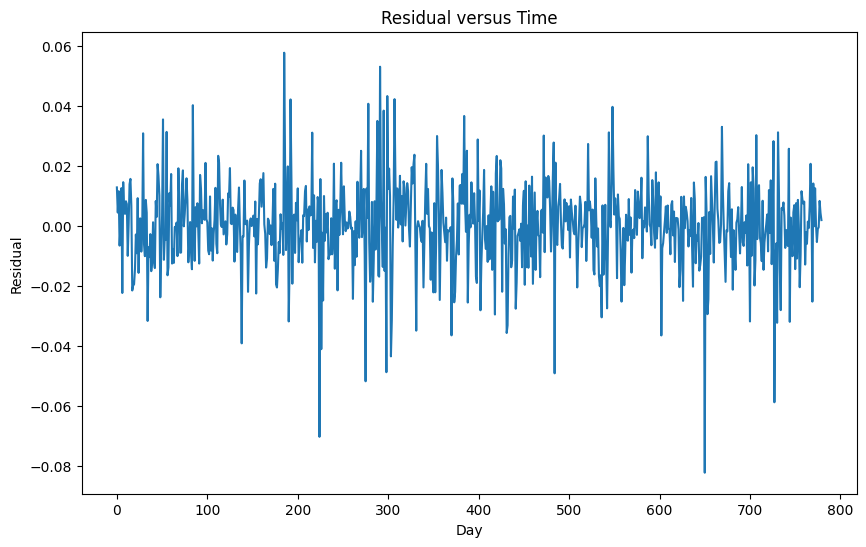

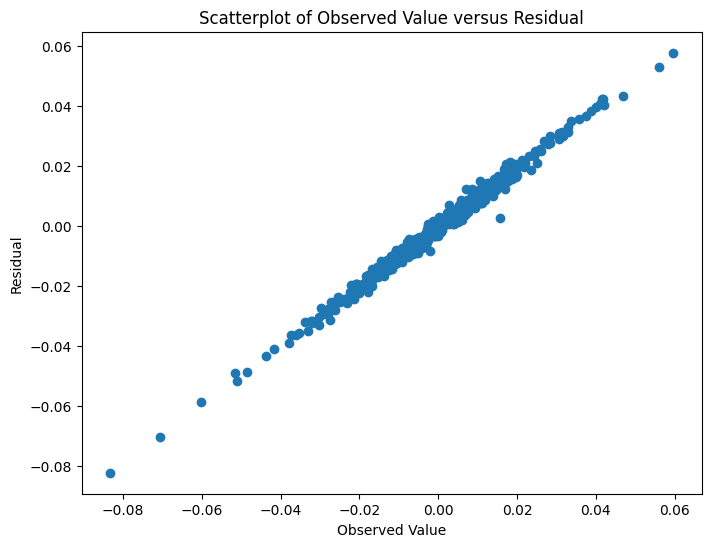

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Assuming g(t) is azn['Log_Returns'], and d1(t), d2(t), d3(t) are dge['Log_Returns'], hsbc['Log_Returns'], and shell['Log_Returns']

# Prepare the data
X = np.column_stack((azn['Log_Returns'][:-1], dge['Log_Returns'][:-1], hsbc['Log_Returns'][:-1], shell['Log_Returns'][:-1]))  # Independent variables
y = azn['Log_Returns'][1:]  # Dependent variable

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Fit the linear regression model with the imputed data
model = LinearRegression()
model.fit(X_imputed, y)

# Predict g(t + 1) using the imputed data
predictions = model.predict(imputer.transform(np.column_stack((azn['Log_Returns'][1:], dge['Log_Returns'][1:], hsbc['Log_Returns'][1:], shell['Log_Returns'][1:]))))

# Compare predictions with the actual values of g(t + 1)
actual_values = azn['Log_Returns'][2:]  # Assuming we're predicting starting from the third day

# Ensure both arrays have the same length
predictions = predictions[:len(actual_values)]

# Calculate residuals
residuals = actual_values.values - predictions

# Scatterplot of (g(t), g(t+1))
plt.figure(figsize=(8, 6))
plt.scatter(azn['Log_Returns'][1:len(predictions)+1], predictions)
plt.xlabel('g(t)')
plt.ylabel('Predicted g(t + 1)')
plt.title('Scatterplot of (g(t), Predicted g(t + 1))')
plt.show()


# Observed and predicted values as time series
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[1:len(predictions)+1], predictions, 'bo', label='Predicted')  # Plotting predicted values with blue markers
plt.plot(df['Date'].iloc[1:len(predictions)+1], actual_values, 'r-', label='Actual')  # Plotting actual values with red line
plt.xlabel('Date')
plt.ylabel('Predicted g(t + 1)')
plt.title('Observed and Predicted Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Graph of residual versus time
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.xlabel('Day')
plt.ylabel('Residual')
plt.title('Residual versus Time')
plt.show()

# Scatterplot of observed value versus residual
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, residuals)
plt.xlabel('Observed Value')
plt.ylabel('Residual')
plt.title('Scatterplot of Observed Value versus Residual')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define the target attribute (g(t)) for each stock
targets = {'azn': azn['Log_Returns'][1:], 'dge': dge['Log_Returns'][1:], 'hsbc': hsbc['Log_Returns'][1:], 'shell': shell['Log_Returns'][1:]}

# Calculate baseline accuracy (mean of g(t))
baseline_accuracies = {stock: np.mean(target) for stock, target in targets.items()}

# Calculate linear model accuracy (R-squared and MSE) for each stock
linear_model_accuracies = {}
for stock, target in targets.items():
    actual_values = target.values
    predictions = model.predict(imputer.transform(np.column_stack((azn['Log_Returns'][1:], dge['Log_Returns'][1:], hsbc['Log_Returns'][1:], shell['Log_Returns'][1:]))))
    predictions = predictions[:len(actual_values)]  # Ensure same length
    r_squared = r2_score(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    linear_model_accuracies[stock] = {'R_squared': r_squared, 'MSE': mse}

# Calculate standard deviation and mean of R-squared values
r_squared_values = [value['R_squared'] for value in linear_model_accuracies.values()]
standard_deviation_r_squared = np.std(r_squared_values)
mean_r_squared = np.mean(r_squared_values)

# Calculate standard deviation and mean of MSE values
mse_values = [value['MSE'] for value in linear_model_accuracies.values()]
standard_deviation_mse = np.std(mse_values)
mean_mse = np.mean(mse_values)

print("Baseline Accuracy (Mean of g(t)):")
for stock, accuracy in baseline_accuracies.items():
    print(f"{stock.capitalize()}: {accuracy}")

print("\nLinear Model Accuracy (R-squared and MSE):")
for stock, metrics in linear_model_accuracies.items():
    print(f"{stock.capitalize()}:")
    print(f"  R-squared: {metrics['R_squared']}")
    print(f"  MSE: {metrics['MSE']}")

print("\nStandard Deviation and Mean of R-squared Values:")
print(f"Standard Deviation: {standard_deviation_r_squared}")
print(f"Mean: {mean_r_squared}")

print("\nStandard Deviation and Mean of MSE Values:")
print(f"Standard Deviation: {standard_deviation_mse}")
print(f"Mean: {mean_mse}")


Baseline Accuracy (Mean of g(t)):
Azn: 0.0004733641156283691
Dge: -9.825306002351616e-06
Hsbc: 0.0006623197521315316
Shell: 0.0008755682781967999

Linear Model Accuracy (R-squared and MSE):
Azn:
  R-squared: -0.13445837780549041
  MSE: 0.00023580221267468395
Dge:
  R-squared: -0.20537875981814047
  MSE: 0.0001939493575661192
Hsbc:
  R-squared: -0.01071450548759656
  MSE: 0.0002580421096573867
Shell:
  R-squared: -0.05853399667958725
  MSE: 0.00032412977247054444

Standard Deviation and Mean of R-squared Values:
Standard Deviation: 0.07409918112045173
Mean: -0.10227140994770367

Standard Deviation and Mean of MSE Values:
Standard Deviation: 4.708398930996718e-05
Mean: 0.0002529808630921836
